In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem
from collections import Counter
import os
import csv
import gmaps


# Set the seed so our data is reproducible
random.seed(50)
from config import(gkey)

In [104]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")

In [105]:

ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [106]:
filt=ca_2019_data[['House Value','Monthly Owner Cost', 'Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.970,-118.250,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.950,-118.250,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.960,-118.270,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.080,-118.310,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.060,-118.310,16345.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,96145,2147.0,49.9,73875.0,47689.0,5.076851,0.000000,666300.0,1974,2419.0,...,96.413600,0.000000,2.095948,0.698649,Tahoe City,Placer County,39.187,-120.116,4764.0,CA
1758,96146,1145.0,43.8,76851.0,61141.0,3.930131,1.135371,911900.0,1981,2745.0,...,93.886463,0.000000,6.812227,0.000000,Olympic Valley,Placer County,39.180,-120.220,1726.0,CA
1759,96148,580.0,31.3,73611.0,28961.0,20.862069,0.000000,750000.0,1978,3375.0,...,100.000000,0.000000,38.103448,0.000000,Tahoe Vista,Placer County,39.240,-120.045,677.0,CA
1760,96150,29327.0,38.8,57396.0,35049.0,10.815972,3.808777,442300.0,1973,1953.0,...,83.943124,0.907014,25.277048,5.544379,South Lake Tahoe,El Dorado County,38.800,-120.100,21720.0,CA


In [107]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")

In [108]:
#Filter for la county


Sd_data_df = (ca_data_2019.loc[(ca_data_2019['County']== "San Diego County") & (ca_data_2019['House Value'] > 0) & (ca_data_2019['Monthly Rent']>0),['City','House Value','Household Income','Monthly Owner Cost','Monthly Rent',
                                                                   'Per Capita Income','Population']])
Sd_data_df




,City,House Value,Household Income,Monthly Owner Cost,Monthly Rent,Per Capita Income,Population
307,Alpine,599800.0,88395.0,2841.0,1622.0,41928.0,18162.0
308,Bonita,662900.0,102617.0,2863.0,1900.0,41227.0,18896.0
309,Boulevard,281600.0,33463.0,1777.0,722.0,20016.0,1472.0
310,Campo,275400.0,50387.0,1739.0,1144.0,21746.0,4428.0
311,Chula Vista,476700.0,65847.0,2350.0,1439.0,30011.0,74855.0
...,...,...,...,...,...,...,...
403,San Diego,790200.0,137500.0,3207.0,2391.0,58982.0,34727.0
407,San Diego,411100.0,69541.0,1993.0,1620.0,25642.0,36105.0
409,San Diego,1376000.0,202266.0,4001.0,1297.0,72060.0,1883.0
411,San Diego,411200.0,66498.0,2198.0,1611.0,21878.0,88979.0


In [109]:
#using groupby method to groupby the data according to city
cities = []
Sd_data = [Sd_data_df]

agg_data = {'House Value': ['mean'],
                'Household Income': ['mean'],
                'Monthly Owner Cost': ['mean'], 
                'Monthly Rent': ['mean'],                                    
                'Per Capita Income': ['mean'],
                'Population': ['sum']}

for data in Sd_data:
    d1 = data[['City','Population','House Value','Household Income','Monthly Owner Cost','Monthly Rent','Per Capita Income']]
    d1.groupby(['City']).agg(agg_data).round(2)
    d2 = d1.nlargest(10,'Population')
    hv = d2.nsmallest(10,'House Value')
    hv_c=hv['City'].tolist()
    mr=d2.nsmallest(20, 'Monthly Rent')
    mr_c=mr['City'].tolist()
    moc=d2.nsmallest(20, 'Monthly Owner Cost')
    moc_c=moc['City'].tolist()
    pci=d2.nlargest(20, 'Per Capita Income')
    pci_c=pci['City'].tolist()
    hi=d2.nlargest(20, 'Household Income')
    hi_c=hi['City'].tolist()
    #Adding cities to list
    all_city=hv_c + mr_c + moc_c + pci_c + hi_c
     #Using counter to count most common
    my_counter=Counter(all_city)
    best_city=my_counter.most_common(5)
    cities.append(best_city)
    
    
print(cities)

    
    
    
    




[[('San Diego', 25), ('Chula Vista', 10), ('National City', 5), ('El Cajon', 5), ('Spring Valley', 5)]]


In [148]:

#getting dataframe for best city
best_cities=[]
city_df=[]
year=['2019']
city_value = []
for i, data in enumerate(Sd_data):
    d3=data[(data['City']==cities[i][0][0])|
            (data['City']==cities[i][1][0])|
            (data['City']==cities[i][2][0])|
            (data['City']==cities[i][3][0])|
            (data['City']==cities[i][4][0])
           ]
    d_city=d3[['City', 'House Value','Household Income','Population',
       'Monthly Owner Cost', 'Monthly Rent',
       'Per Capita Income']]
    d_city=d_city.groupby('City').mean()
    city_value.append(d_city)
    d3=d3.drop_duplicates(subset=['City'],keep='last')
    city_df.append(d3)
    # Convert best city to list
    best_city=(cities[i][0][0], cities[i][1][0], cities[i][2][0],cities[i][3][0],cities[i][4][0])
    best_city=list(best_city)
    print(f'Best cities for {year[i]} are:{best_city}')
    best_cities.append(best_city)

Best cities for 2019 are:['San Diego', 'Chula Vista', 'National City', 'El Cajon', 'Spring Valley']


In [156]:
#value of best cities

for i in range(1):
    best_cities_values=city_value[i]
   
    print(round(best_cities_values))
    print("*"*80)
    print()

Sd_df = pd.DataFrame(best_cities_values)
Sd_df

               House Value  Household Income  Population  Monthly Owner Cost  \
City                                                                           
Chula Vista       529920.0           95544.0     52772.0              2695.0   
El Cajon          488367.0           68102.0     57721.0              2409.0   
National City     400300.0           46708.0     62859.0              1922.0   
San Diego         655158.0           89444.0     43622.0              2676.0   
Spring Valley     439950.0           71404.0     37628.0              2257.0   

               Monthly Rent  Per Capita Income  
City                                            
Chula Vista          2037.0            33169.0  
El Cajon             1468.0            30933.0  
National City        1154.0            21781.0  
San Diego            1780.0            44177.0  
Spring Valley        1615.0            28578.0  
********************************************************************************



,House Value,Household Income,Population,Monthly Owner Cost,Monthly Rent,Per Capita Income
City,,,,,,
Chula Vista,529920.000000,95544.000000,52771.800000,2695.000000,2037.400000,33168.600000
El Cajon,488366.666667,68102.000000,57721.000000,2408.666667,1468.000000,30933.333333
National City,400300.000000,46708.000000,62859.000000,1922.000000,1154.000000,21781.000000
San Diego,655158.064516,89444.032258,43622.064516,2676.290323,1780.322581,44176.677419
Spring Valley,439950.000000,71403.500000,37628.000000,2257.000000,1615.000000,28578.000000


In [158]:
file_name = "SdCitydata.csv"
Sd_df.to_csv(file_name, encoding='utf-8', index=False)

In [167]:
new_sd_df=pd.read_csv("SdCitydata.csv")   
new_sd_df

,City,House Value,Household Income,Population,Monthly Owner Cost,Monthly Rent,Per Capita Income
0,Chula Vista,529920.00,95544.00,52771.80,2695.00,2037.40,33168.60
1,El Cajon,488366.67,68102.00,57721.00,2408.67,1468.00,30933.33
2,National City,400300.00,46708.00,62859.00,1922.00,1154.00,21781.00
3,San Diego,655158.06,89444.03,43622.06,2676.29,1780.32,44176.68
4,Spring Valley,439950.00,71403.50,37628.00,2257.00,1615.00,28578.00


([<matplotlib.axis.XTick at 0x2b0d96a71c0>,
 [Text(0.4, 0, 'Chula Vista'),
  Text(1.4, 0, 'El Cajon'),
  Text(2.4, 0, 'National City'),
  Text(3.4, 0, 'San Diego'),
  Text(4.4, 0, 'Spring Valley')])

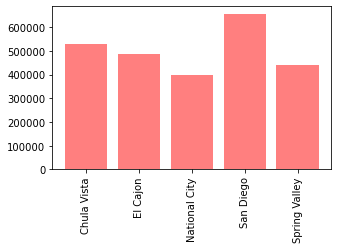

In [175]:
x_axis = np.arange(len(new_sd_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, new_sd_df["House Value"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, new_sd_df["City"], rotation="vertical")